Imports


In [3]:
import pandas as pd
from scipy import stats 
import numpy as np
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr

Load The Data


In [4]:
main_df = pd.read_csv('Data\\Months_237\\post_proccess\\post_data_prep.csv')
main_df.dropna(inplace=True)
main_df['pickup_date'] = main_df['pickup_date'] = pd.to_datetime(main_df['pickup_date'])
main_df

,pickup_date,weekday,isShort,time_binned,Tmax,Tmin,Tavg,Tdep,HDD,CDD,Precipitation,new_snow,snow_depth,trip_distance,trip_time,speed,num_of_taxis
0,2019-01-01,Tuesday,0,00:00 - 00:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.236584,13.068116,11.315506,161
1,2019-01-01,Tuesday,0,01:00 - 01:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.295872,12.627035,11.605773,172
2,2019-01-01,Tuesday,0,02:00 - 02:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.389091,11.640476,12.789540,77
3,2019-01-01,Tuesday,0,03:00 - 03:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.350000,10.472619,13.967923,28
4,2019-01-01,Tuesday,0,04:00 - 04:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.254615,8.807692,15.428436,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2019-12-31,Tuesday,1,19:00 - 19:59,45.0,36.0,40.5,5.1,24.0,0.0,0.02,0.0,0.0,0.840947,5.359649,10.038636,190
17516,2019-12-31,Tuesday,1,20:00 - 20:59,45.0,36.0,40.5,5.1,24.0,0.0,0.02,0.0,0.0,0.846373,5.698944,9.385548,284
17517,2019-12-31,Tuesday,1,21:00 - 21:59,45.0,36.0,40.5,5.1,24.0,0.0,0.02,0.0,0.0,0.887850,5.446583,10.290132,200
17518,2019-12-31,Tuesday,1,22:00 - 22:59,45.0,36.0,40.5,5.1,24.0,0.0,0.02,0.0,0.0,0.920698,5.432429,10.497624,129


Stats Test to find if there are different between Days


In [8]:
uses_per_day = main_df\
    .groupby(['pickup_date'],as_index=False)\
    .agg({'num_of_taxis' : 'sum', 'weekday' : lambda x: x.iloc[1]})
uses_per_day.head(2)

,pickup_date,num_of_taxis,weekday
0,2019-01-01,3818,Tuesday
1,2019-01-02,6658,Wednesday


In [9]:
week = {
    'Monday':uses_per_day.loc[uses_per_day['weekday'] == 'Monday'].num_of_taxis.tolist(),
    'Tuesday':uses_per_day.loc[uses_per_day['weekday'] == 'Tuesday'].num_of_taxis.tolist(),
    'Wednesday':uses_per_day.loc[uses_per_day['weekday'] == 'Wednesday'].num_of_taxis.tolist(),
    'Thursday':uses_per_day.loc[uses_per_day['weekday'] == 'Thursday'].num_of_taxis.tolist(),
    'Friday':uses_per_day.loc[uses_per_day['weekday'] == 'Friday'].num_of_taxis.tolist(),
    'Saturday':uses_per_day.loc[uses_per_day['weekday'] == 'Saturday'].num_of_taxis.tolist(),
    'Sunday':uses_per_day.loc[uses_per_day['weekday'] == 'Sunday'].num_of_taxis.tolist()
}

In [10]:
stat, p = stats.f_oneway(
                        week.get('Sunday'),
                        week.get('Monday'),
                        week.get('Tuesday'),
                        week.get('Wednesday'),
                        week.get('Thursday'),
                        week.get('Friday'),
                        week.get('Saturday')
)
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

Probably different distributions


In [11]:
duplicates_list = []
for day1,value1 in week.items():
    for day2,value2 in week.items():
        if day1 == day2:
            continue
        stat, p = stats.ttest_ind(value1,value2)
        if p > 0.05:
            if(day2 + day1 not in duplicates_list):
                duplicates_list.append(day1+day2)
                print(f'{day1} and {day2} probably have same distribution. P-Value = {p}')

Monday and Friday probably have same distribution. P-Value = 0.13772456000380504
Tuesday and Wednesday probably have same distribution. P-Value = 0.41159872356557126
Tuesday and Thursday probably have same distribution. P-Value = 0.46742835281047146
Wednesday and Thursday probably have same distribution. P-Value = 0.9960755135040782


In [ ]:
import itertools
duplicates_list = []
for itertools.product()
for day1,value1 in week.items():
    for day2,value2 in week.items():
        if day1 == day2:
            continue
        stat, p = stats.ttest_ind(value1,value2)
        if p > 0.05:
            if(day2 + day1 not in duplicates_list):
                duplicates_list.append(day1+day2)
                print(f'{day1} and {day2} probably have same distribution. P-Value = {p}')

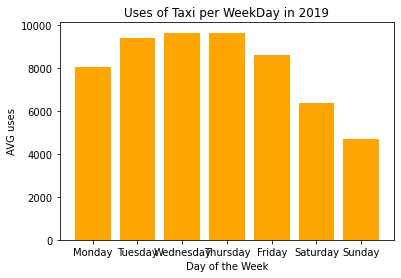

In [12]:
keys = week.keys()
values = week.values()
values1 = []
for val in values:
    values1.append(np.mean(val))
plt.bar(keys,values1,color = 'orange')
plt.rcParams["figure.figsize"] = (12,5)
plt.xlabel('Day of the Week')
plt.ylabel('AVG uses')
plt.title('Uses of Taxi per WeekDay in 2019')
plt.show()

Is temperatures affecting the number of taxi users 

C:\Users\barka\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


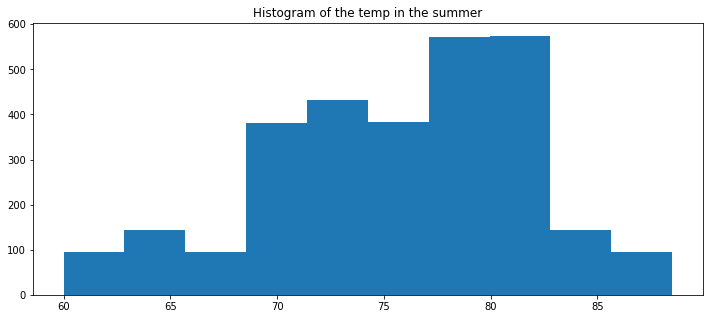

In [13]:
temp_df = main_df[['pickup_date','time_binned','Tmax','Tmin','Tavg','Precipitation','snow_depth','num_of_taxis']]
temp_df['month'] = temp_df['pickup_date'].dt.month_name()
summer = temp_df.loc[(temp_df['month'] == 'June') | (temp_df['month'] == 'July')]

winter = temp_df.loc[(temp_df['month'] == 'December') | (temp_df['month'] == 'January') | (temp_df['month'] == 'February')]
fall = temp_df.loc[(temp_df['month'] == 'September') | (temp_df['month'] == 'October') | (temp_df['month'] == 'November')]
spring = temp_df.loc[(temp_df['month'] == 'March') | (temp_df['month'] == 'April') | (temp_df['month'] == 'May')]
plt.hist(summer.Tavg)
plt.title('Histogram of the temp in the summer')
plt.show()

First we try to find correlation between the AVG temperature and the number of taxis based on the entire dataset.

In [14]:
print('Pearson Correlation:')
corr,p_value = pearsonr(temp_df['Tavg'],temp_df['num_of_taxis'])
print('Correlation: '+str(corr))
print('P-Value: '+str(p_value))
print('Spearman Correlation:')
corr,p_value = spearmanr(temp_df['Tavg'],temp_df['num_of_taxis'])
print('Correlation: '+str(corr))
print('P-Value: '+str(p_value))

Pearson Correlation:
Correlation: -0.10722030438009339
P-Value: 9.442433800986917e-46
Spearman Correlation:
Correlation: -0.09176807337303661
P-Value: 6.301791510384596e-34


based on the whole year, we can see there is a low correlation, and that can be because the Tavg is an avg of the temp in the day, can be really cold at night but warm during the day.
Because of that, we are going to find the correlation in a more specific way, for example we going to look at the max temperature during the noon at the summer only.

In [15]:
main_df['month'] = pd.to_datetime(main_df['pickup_date']).dt.month_name()
noon = [
            '12:00 - 12:59',
            '13:00 - 13:59',
            '14:00 - 14:59',
            '15:00 - 15:59',
            ]
noon_summer_df = summer.loc[summer['time_binned'].isin(noon)]
noon_winter_df = winter.loc[winter['time_binned'].isin(noon)]
noon_fall_df = fall.loc[fall['time_binned'].isin(noon)]
noon_spring_df = spring.loc[spring['time_binned'].isin(noon)]

In [16]:
print('~~~ SUMMER ~~~')
noon_summer_df_correlation = noon_summer_df.dropna()._get_numeric_data()
print('Pearson Correlation:')
corr,p_value = pearsonr(noon_summer_df_correlation['Tmax'],noon_summer_df_correlation['num_of_taxis'])
print('Correlation: '+str(corr))
print('P-Value: '+str(p_value))
print('Spearman Correlation:')
corr,p_value = spearmanr(noon_summer_df_correlation['Tmax'],noon_summer_df_correlation['num_of_taxis'])
print('Correlation: '+str(corr))
print('P-Value: '+str(p_value))

~~~ SUMMER ~~~
Pearson Correlation:
Correlation: -0.18748690030747062
P-Value: 3.071257481405461e-05
Spearman Correlation:
Correlation: -0.18592316304857245
P-Value: 3.584772266560207e-05


In [17]:
print('~~~ SPRING ~~~')
noon_spring_df_correlation = noon_summer_df.dropna()._get_numeric_data()
print('Pearson Correlation:')
corr,p_value = pearsonr(noon_spring_df_correlation['Tmax'],noon_spring_df_correlation['num_of_taxis'])
print('Correlation: '+str(corr))
print('P-Value: '+str(p_value))
print('Spearman Correlation:')
corr,p_value = spearmanr(noon_spring_df_correlation['Tmax'],noon_spring_df_correlation['num_of_taxis'])
print('Correlation: '+str(corr))
print('P-Value: '+str(p_value))

~~~ SPRING ~~~
Pearson Correlation:
Correlation: -0.18748690030747062
P-Value: 3.071257481405461e-05
Spearman Correlation:
Correlation: -0.18592316304857245
P-Value: 3.584772266560207e-05


In [18]:
print('~~~ WINTER ~~~')
noon_winter_df_correlation = noon_winter_df.dropna()._get_numeric_data()
print('Pearson Correlation:')
corr,p_value = pearsonr(noon_winter_df_correlation['Tmax'],noon_winter_df_correlation['num_of_taxis'])
print('Correlation: '+str(corr))
print('P-Value: '+str(p_value))
print('Spearman Correlation:')
corr,p_value = spearmanr(noon_winter_df_correlation['Tmax'],noon_winter_df_correlation['num_of_taxis'])
print('Correlation: '+str(corr))
print('P-Value: '+str(p_value))

~~~ WINTER ~~
Pearson Correlation:
Correlation: -0.12430035684485286
P-Value: 0.0008302600324719973
Spearman Correlation:
Correlation: -0.16067270808994122
P-Value: 1.4777077045987626e-05


In [19]:
print('~ FALL ~')
noon_fall_df_correlation = noon_fall_df.dropna()._get_numeric_data()
print('Pearson Correlation:')
corr,p_value = pearsonr(noon_fall_df_correlation['Tmax'],noon_fall_df_correlation['num_of_taxis'])
print('Correlation: '+str(corr))
print('P-Value: '+str(p_value))
print('Spearman Correlation:')
corr,p_value = spearmanr(noon_fall_df_correlation['Tmax'],noon_fall_df_correlation['num_of_taxis'])
print('Correlation: '+str(corr))
print('P-Value: '+str(p_value))

~ FALL ~
Pearson Correlation:
Correlation: -0.09453799650334924
P-Value: 0.010707292557114952
Spearman Correlation:
Correlation: -0.12960351846915955
P-Value: 0.00045544097683492923


Correlation for each month

In [20]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
noon_df = temp_df[temp_df['time_binned'].isin(noon)]
print("Correlation & P-Value between Tavg and Number of Taxis")
for month in months:
    month_df = noon_df.loc[noon_df['month'] == month].dropna()._get_numeric_data()
    corr,p_value = pearsonr(month_df['Tmax'],month_df['num_of_taxis'])
    print(f'{month} :')
    print(f'Correlation: {format(corr,"0.4f")}')
    print(f'P-Value: {format(p_value,"0.6f")}')

Correlation & P-Value between Tavg and Number of Taxis
January :
Correlation: -0.1167
P-Value: 0.066498
February :
Correlation: -0.0760
P-Value: 0.257361
March :
Correlation: -0.1583
P-Value: 0.012541
April :
Correlation: -0.0813
P-Value: 0.209713
May :
Correlation: -0.1472
P-Value: 0.020363
June :
Correlation: -0.1386
P-Value: 0.031872
July :
Correlation: -0.0825
P-Value: 0.195525
August :
Correlation: 0.0573
P-Value: 0.368706
September :
Correlation: -0.0337
P-Value: 0.603009
October :
Correlation: -0.0049
P-Value: 0.939139
November :
Correlation: 0.0240
P-Value: 0.711020
December :
Correlation: -0.1600
P-Value: 0.011632


In [21]:
two_to_three_summer_df = summer.loc[summer['time_binned'] == '14:00 - 14:59'].groupby('pickup_date',as_index=False).agg({
    'Tmax':'mean',
    'num_of_taxis':'sum'
})
hot_days =  []
not_hot_days = []
for i,row in two_to_three_summer_df.iterrows():
    if i == len(two_to_three_summer_df)-7:
        break
    if row.Tmax >= 80 and two_to_three_summer_df.iloc[i+7].Tmax < 80:
        hot_days.append(row.num_of_taxis)
        not_hot_days.append(two_to_three_summer_df.iloc[i+7].num_of_taxis)
hot_days,not_hot_days

([412, 723, 775, 764, 461, 487, 709, 630],
 [343, 734, 684, 641, 388, 451, 570, 543])

In [22]:
print('number of usage in days <80F')
print(not_hot_days)
print('Mean: ' + str(np.mean(not_hot_days)))
print('Median: '+ str(np.median(not_hot_days)))

number of usage in days <80F
[343, 734, 684, 641, 388, 451, 570, 543]
Mean: 544.25
Median: 556.5


In [23]:
print('')
stat,p = stats.ttest_rel(hot_days,not_hot_days,alternative='two-sided')
print(p/2)
if p < 0.05:
    print('H0 rejected')


0.0013592613212946214
H0 rejected


In [24]:
print('Wilcoxon Test')
stat, p = stats.wilcoxon(hot_days,not_hot_days)
print('P-Value: ' + str(p/2))
if p < 0.05:
    print('H0 rejected')

Wilcoxon Test
P-Value: 0.0078125
H0 rejected


In [25]:
two_to_three_winter_df = winter.loc[winter['time_binned'] == '14:00 - 14:59'].groupby('pickup_date',as_index=False).agg({
    'Tmax':'mean',
    'num_of_taxis':'sum'
})
cold_days =  []
not_cold_days = []
for i,row in two_to_three_winter_df.iterrows():
    if i == len(two_to_three_winter_df)-7:
        break
    if row.Tmax <= 40 and two_to_three_winter_df.iloc[i+7].Tmax > 40:
        cold_days.append(row.num_of_taxis)
        not_cold_days.append(two_to_three_winter_df.iloc[i+7].num_of_taxis)
cold_days,not_cold_days

([558,
  528,
  883,
  923,
  766,
  723,
  728,
  733,
  908,
  699,
  669,
  384,
  769,
  725,
  474,
  635,
  791,
  772,
  774,
  838,
  848,
  905,
  836,
  680],
 [863,
  479,
  768,
  714,
  861,
  663,
  759,
  787,
  724,
  435,
  509,
  440,
  799,
  819,
  579,
  772,
  733,
  716,
  655,
  582,
  187,
  439,
  467,
  381])

In [26]:
print('days >40F')
print('Mean: ' + str(np.mean(not_cold_days)))
print('Median: '+ str(np.median(not_cold_days)))

days >40F
Mean: 630.4583333333334
Median: 688.5


In [27]:
np.mean(cold_days),np.median(cold_days)

(731.2083333333334, 749.5)

In [28]:
np.mean(not_cold_days),np.median(not_cold_days)

(630.4583333333334, 688.5)

In [29]:
print('T-Test')
stat,p = stats.ttest_rel(cold_days,not_cold_days,alternative='two-sided')
print('P-Value: '+str(p/2))
if p < 0.05:
    print('H0 rejected')

T-Test
P-Value: 0.01556170790749541
H0 rejected


In [30]:
stat, p = stats.wilcoxon(cold_days,not_cold_days,zero_method='wilcox')
print(p/2)
if p < 0.05:
    print('H0 rejected')

0.019740819931030273
H0 rejected


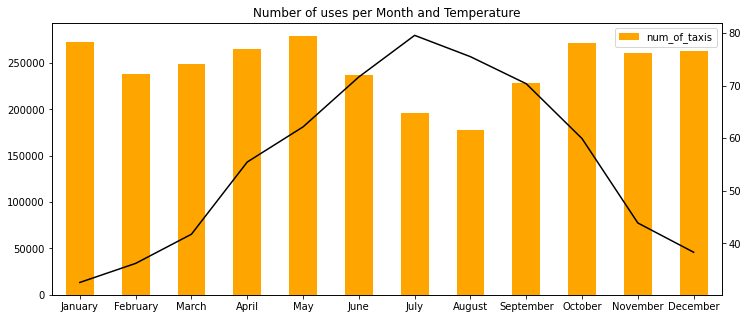

In [31]:
temp_per_month = temp_df.groupby('month',as_index=False,sort=False).agg({'num_of_taxis':'sum','Tavg':'mean'})
temp_per_month
fig, ax = plt.subplots(figsize=(12,5))
temp_per_month.plot(y=['num_of_taxis'],kind='bar',color='orange',ax = ax)
temp_per_month.plot(y=['Tavg'],kind='line',color='black',ax = ax,secondary_y=True)
ax.set_xticklabels(temp_per_month['month'])
plt.title('Number of uses per Month and Temperature')
ax.legend(loc='upper right')
plt.show()

Stats Tests to find if there are different between hours


In [11]:
uses_per_hour = main_df.groupby('time_binned',as_index=False).agg({'num_of_taxis':'sum'})
uses_per_hour

,time_binned,num_of_taxis
0,00:00 - 00:59,26217
1,01:00 - 01:59,10882
2,02:00 - 02:59,5108
3,03:00 - 03:59,3326
4,04:00 - 04:59,3014
5,05:00 - 05:59,8406
6,06:00 - 06:59,34869
7,07:00 - 07:59,113056
8,08:00 - 08:59,148813
9,09:00 - 09:59,152962


In [33]:
hours = main_df['time_binned'].explode().unique()
hours_dict = {h:[] for h in hours}
for hour in hours_dict:
    hours_dict[hour] = main_df.loc[main_df['time_binned'] == hour].num_of_taxis.tolist()

In [34]:
stat,p = stats.kruskal(
                        hours_dict.get('00:00 - 00:59'),
                        hours_dict.get('01:00 - 01:59'),
                        hours_dict.get('02:00 - 02:59'),
                        hours_dict.get('03:00 - 03:59'),
                        hours_dict.get('04:00 - 04:59'),
                        hours_dict.get('05:00 - 05:59'),
                        hours_dict.get('06:00 - 06:59'),
                        hours_dict.get('07:00 - 07:59'),
                        hours_dict.get('08:00 - 08:59'),
                        hours_dict.get('09:00 - 09:59'),
                        hours_dict.get('10:00 - 10:59'),
                        hours_dict.get('11:00 - 11:59'),
                        hours_dict.get('12:00 - 12:59'),
                        hours_dict.get('13:00 - 13:59'),
                        hours_dict.get('14:00 - 14:59'),
                        hours_dict.get('15:00 - 15:59'),
                        hours_dict.get('16:00 - 16:59'),
                        hours_dict.get('17:00 - 17:59'),
                        hours_dict.get('18:00 - 18:59'),
                        hours_dict.get('19:00 - 19:59'),
                        hours_dict.get('20:00 - 20:59'),
                        hours_dict.get('21:00 - 21:59'),
                        hours_dict.get('22:00 - 22:59'),
                        hours_dict.get('23:00 - 23:59')
                )
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

Probably different distributions


In [35]:
duplicates_list = []
raw_alpha = []
hours_connections = []
alpha = 0.05

for hour1,val1 in hours_dict.items():
    for hour2,val2 in hours_dict.items():
        if hour1 == hour2:
            continue
        stat,p = stats.mannwhitneyu(val1,val2)
        if hour2 + hour1 not in duplicates_list:
            raw_alpha.append(p)
            hours_connections.append(hour1+' '+hour2)
            duplicates_list.append(hour1 + hour2)
            if p > alpha:
                print(f'{hour1} and {hour2} probably have same distribution')

07:00 - 07:59 and 22:00 - 22:59 probably have same distribution
08:00 - 08:59 and 22:00 - 22:59 probably have same distribution
09:00 - 09:59 and 21:00 - 21:59 probably have same distribution
10:00 - 10:59 and 20:00 - 20:59 probably have same distribution
12:00 - 12:59 and 13:00 - 13:59 probably have same distribution
12:00 - 12:59 and 19:00 - 19:59 probably have same distribution
13:00 - 13:59 and 16:00 - 16:59 probably have same distribution
13:00 - 13:59 and 19:00 - 19:59 probably have same distribution
14:00 - 14:59 and 15:00 - 15:59 probably have same distribution
14:00 - 14:59 and 17:00 - 17:59 probably have same distribution
14:00 - 14:59 and 18:00 - 18:59 probably have same distribution
15:00 - 15:59 and 17:00 - 17:59 probably have same distribution
15:00 - 15:59 and 18:00 - 18:59 probably have same distribution
16:00 - 16:59 and 19:00 - 19:59 probably have same distribution
17:00 - 17:59 and 18:00 - 18:59 probably have same distribution


In [36]:
d = {'hours':hours_connections,'raw_alpha':raw_alpha}
hours_p_value = pd.DataFrame(d)
rejected, p_adjusted, _, alpha_corrected = multipletests(hours_p_value.raw_alpha,alpha=alpha,method = 'holm',is_sorted=False, returnsorted=False)


In [37]:
hours_with_same_dist_bonferroni = hours_p_value.loc[np.invert(rejected)]
hours_with_same_dist_bonferroni.reset_index(inplace=True,drop=True)
hours_with_same_dist_bonferroni

,hours,raw_alpha
0,03:00 - 03:59 04:00 - 04:59,0.007862
1,07:00 - 07:59 22:00 - 22:59,0.070395
2,08:00 - 08:59 09:00 - 09:59,0.041813
3,08:00 - 08:59 22:00 - 22:59,0.162993
4,09:00 - 09:59 10:00 - 10:59,0.010946
5,09:00 - 09:59 21:00 - 21:59,0.340540
6,10:00 - 10:59 20:00 - 20:59,0.488813
7,10:00 - 10:59 21:00 - 21:59,0.017662
8,11:00 - 11:59 20:00 - 20:59,0.002475
9,12:00 - 12:59 13:00 - 13:59,0.307100


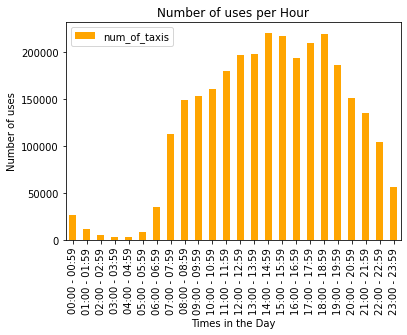

In [15]:
uses_per_hour.plot('time_binned', 'num_of_taxis', kind='bar', rot=90,color='orange')
plt.title('Number of uses per Hour')
plt.xlabel('Times in the Day')
plt.ylabel('Number of uses')
plt.show()

In [12]:
def is_normal(data):
    stat, p = stats.shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [17]:
is_normal(uses_per_hour['num_of_taxis'])

Statistics=0.865, p=0.004
Sample does not look Gaussian (reject H0)
